In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
file_path = "Student_Performance.csv"
df = pd.read_csv(file_path)


In [3]:
# Assuming the first N-1 columns are independent variables and the last column is the dependent variable
X = df.iloc[:, :-1].values  # Independent variables
Y = df.iloc[:, -1].values   # Dependent variable


In [6]:
# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Extract features and target variable
X = df.iloc[:, :-1].values  # Independent variables
Y = df.iloc[:, -1].values   # Dependent variable

# Convert X to float to prevent conversion errors
X = X.astype(float)

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: 1.6933581105362765
Coefficients: [-0.09960875 -0.03556706 -0.02309643 -0.00466964  0.03511382]


In [12]:
# Predict the output for the test set
Y_pred = model.predict(X_test)
print("\nPredicted Outputs for Test Data:")
print(Y_pred)



Predicted Outputs for Test Data:
[0.33788108 0.43058923 0.4345538  0.37695626 0.43030553 0.5027965
 0.58565686 0.49561446 0.46019112 0.52306125 0.58671656 0.69370481
 0.49901047 0.53615409 0.5983353  0.36619277 0.65949122 0.49176207
 0.3906779  0.31644105 0.36886184 0.46809635 0.46511607 0.47353323
 0.48475535 0.50234216 0.51743353 0.6315248  0.54024977 0.53980266
 0.5115066  0.54013759 0.62806409 0.58937252 0.55805638 0.48861798
 0.33315144 0.50081683 0.46745587 0.51453585 0.44312092 0.41601168
 0.55521331 0.45149298 0.55865381 0.49611243 0.45629023 0.43929991
 0.41073007 0.38459142 0.49938664 0.4539057  0.55264994 0.66819629
 0.3680132  0.47615059 0.4809542  0.40975934 0.47197157 0.53471163
 0.55505349 0.44320343 0.52643131 0.54180118 0.34758164 0.49012468
 0.53952777 0.49849601 0.52047227 0.4219617  0.48482559 0.53638425
 0.46910939 0.62125352 0.37536309 0.49760565 0.52353363 0.42584584
 0.51869467 0.51094513 0.48990449 0.36941995 0.56402214 0.55029761
 0.39703581 0.48035414 0.3961

In [14]:
# Calculate RMSE and R² Score
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

In [16]:
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Root Mean Squared Error (RMSE): 0.4916376140942313
R² Score: 0.032701653231090644


In [18]:
# Show column names to confirm correct feature names
print("Available Columns in Dataset:", df.columns)

Available Columns in Dataset: Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index',
       'Extracurricular Activities_Yes'],
      dtype='object')


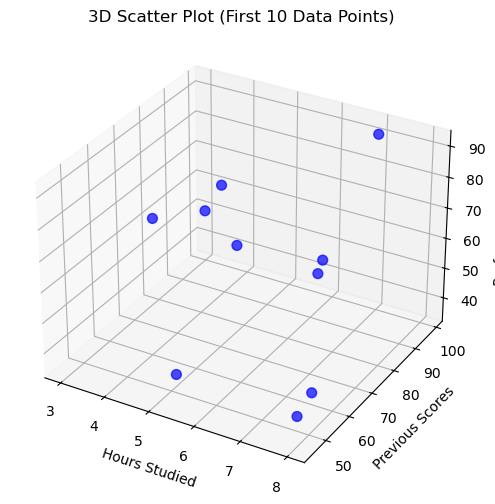

In [34]:
## Just showing the 1st 10 data point in 3D_hours studied and previous score is taken as input here
# Replace these with the EXACT column names from your dataset
x_feature = "Hours Studied"  # Change if different
y_feature = "Previous Scores"  # Change if different
z_feature = "Performance Index"  # Change if different

# Ensure selected columns exist
for feature in [x_feature, y_feature, z_feature]:
    if feature not in df.columns:
        raise KeyError(f"Column '{feature}' not found in dataset. Please check column names.")

# Extract first 10 data points
X = df[x_feature].iloc[:10].values
Y = df[y_feature].iloc[:10].values
Z = df[z_feature].iloc[:10].values

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for first 10 data points
ax.scatter(X, Y, Z, color='blue', marker='o', s=50, alpha=0.7)

# Label axes
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)
ax.set_title("3D Scatter Plot (First 10 Data Points)")

plt.show()
